In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 


df = pd.read_csv("../Data/Default.csv")
df.head()

default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [3]:
df["default"].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

<AxesSubplot:xlabel='balance', ylabel='income'>

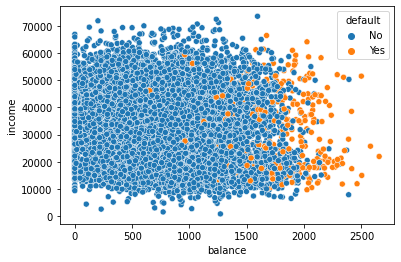

In [4]:
sns.scatterplot(data = df, x = "balance", y = "income", hue = "default")

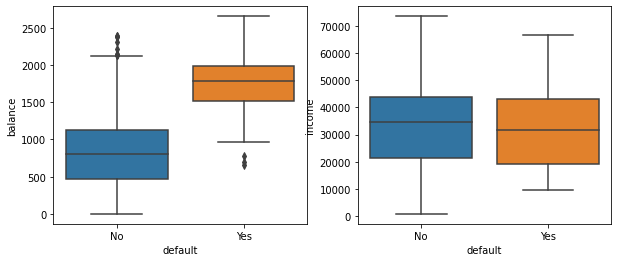

In [5]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

for ax, col in zip(axes, ["balance", "income"]):
    sns.boxplot(data=df, x="default", y=col, ax=ax)


## One-hot encoding

In [6]:
df = pd.get_dummies(df, columns = ["default", "student"], drop_first = True)
df

balance        income  default_Yes  student_Yes
0      729.526495  44361.625074            0            0
1      817.180407  12106.134700            0            1
2     1073.549164  31767.138947            0            0
3      529.250605  35704.493935            0            0
4      785.655883  38463.495879            0            0
...           ...           ...          ...          ...
9995   711.555020  52992.378914            0            0
9996   757.962918  19660.721768            0            0
9997   845.411989  58636.156984            0            0
9998  1569.009053  36669.112365            0            0
9999   200.922183  16862.952321            0            1

[10000 rows x 4 columns]

## Logistic function

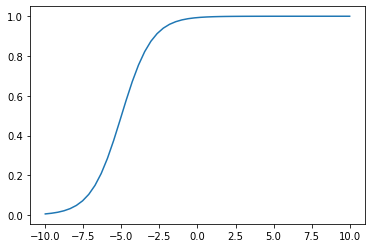

In [23]:
logistic_function = lambda beta_0, beta_1, x: np.exp(beta_0 + beta_1*x)/(1+np.exp(beta_0+beta_1*x))
x = np.linspace(-10,10)

beta_0, beta_1 = 5, 1

plt.plot(x, logistic_function(beta_0, beta_1, x))

# uppgiften är att estimera beta_0 och beta_1 s.a. logistiska funktionen ger korrekta klasser till 
# target variabeln

## Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.drop("default_Yes", axis = "columns"), df["default_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape)

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(scaled_X_train.mean(), scaled_X_test.mean())
print(scaled_X_train.std(), scaled_X_test.std())

model_logistic = LogisticRegression("none")
model_logistic.fit(scaled_X_train, y_train)
model_logistic.coef_, model_logistic.intercept_

(6700, 3) (3300, 3)
7.74173428514736e-17 -0.005467573543403287
1.0 0.9870951848219804


(array([[ 2.888348  ,  0.00687543, -0.28952422]]), array([-6.36240853]))

In [36]:
test_sample = pd.DataFrame({"balance": [1500, 1500], "income": [40000, 40000], "student_Yes": [1, 0]})
print(test_sample)

scaled_X_test_sample = scaler.transform(test_sample)

model_logistic.predict_proba(scaled_X_test_sample)

   balance  income  student_Yes
0     1500   40000            1
1     1500   40000            0


array([[0.94485389, 0.05514611],
       [0.90084904, 0.09915096]])

In [37]:
model_logistic.classes_

array([0, 1], dtype=uint8)

In [39]:
y_pred_probability = model_logistic.predict_proba(scaled_X_test)
y_pred_probability[:3], y_test[:3]

(array([[9.30448543e-01, 6.95514567e-02],
        [9.98551323e-01, 1.44867725e-03],
        [9.99985411e-01, 1.45887899e-05]]),
 6252    0
 4684    0
 1731    0
 Name: default_Yes, dtype: uint8)

## Evaluation

Accuracy: 0.973


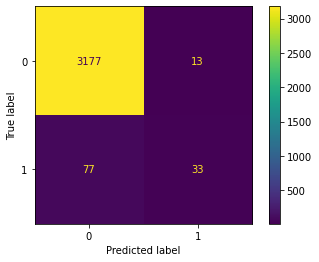

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

y_pred = model_logistic.predict(scaled_X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

cm = confusion_matrix(y_test, y_pred, labels = model_logistic.classes_)

ConfusionMatrixDisplay(cm).plot();

## Metrics

$$prec = \frac{TP}{TP+FP}$$

$$rec = \frac{TP}{TP+FN}$$

In [51]:
rec = 33/(33+77)
prec = 33/(33+13)

print(f"Recall: {rec}")
print(f"Precision: {prec}")


Recall: 0.3
Precision: 0.717391304347826


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3190
           1       0.72      0.30      0.42       110

    accuracy                           0.97      3300
   macro avg       0.85      0.65      0.70      3300
weighted avg       0.97      0.97      0.97      3300

